## Anomaly Detection Using IsolationForest Algorithm

#### Step 1: Load the data

In [19]:
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns  
import matplotlib.pyplot as plt 

In [20]:
data = pd.read_csv('data.csv')
data.fillna(method='ffill', inplace=True)
data['time'] = pd.to_datetime(data['time'])
data.head()

,time,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft
0,2017-01-17 00:00:00,867.63,910.42,-189.54,-186.04,852.13,-145.9
1,2017-01-17 00:05:00,879.23,918.14,-184.33,-182.1,862.53,-149.76
2,2017-01-17 00:10:00,875.67,924.18,-181.26,-166.47,866.06,-145.01
3,2017-01-17 00:15:00,875.28,923.15,-179.15,-174.83,865.85,-142.82
4,2017-01-17 00:20:00,891.66,934.26,-178.32,-173.72,876.06,-143.39


#### Step 2: Handling the missing values

In [21]:
if data.isnull().values.any():
    data.fillna(data.mean(), inplace=True)

In [22]:
float_columns = ['Cyclone_Inlet_Gas_Temp', 'Cyclone_Gas_Outlet_Temp', 'Cyclone_Outlet_Gas_draft', 
                'Cyclone_cone_draft', 'Cyclone_Inlet_Draft', 'Cyclone_Material_Temp']

non_numeric_rows = data[float_columns].apply(pd.to_numeric, errors='coerce')
non_numeric_rows = data[float_columns][non_numeric_rows.isnull().any(axis=1)]
data[float_columns] = data[float_columns].apply(pd.to_numeric, errors='coerce')
data = data.dropna(subset=float_columns)
data[float_columns] = data[float_columns].astype(np.float64)

#### Step 3: Visualize the data for better understanding

##### 3.1: Line plot 

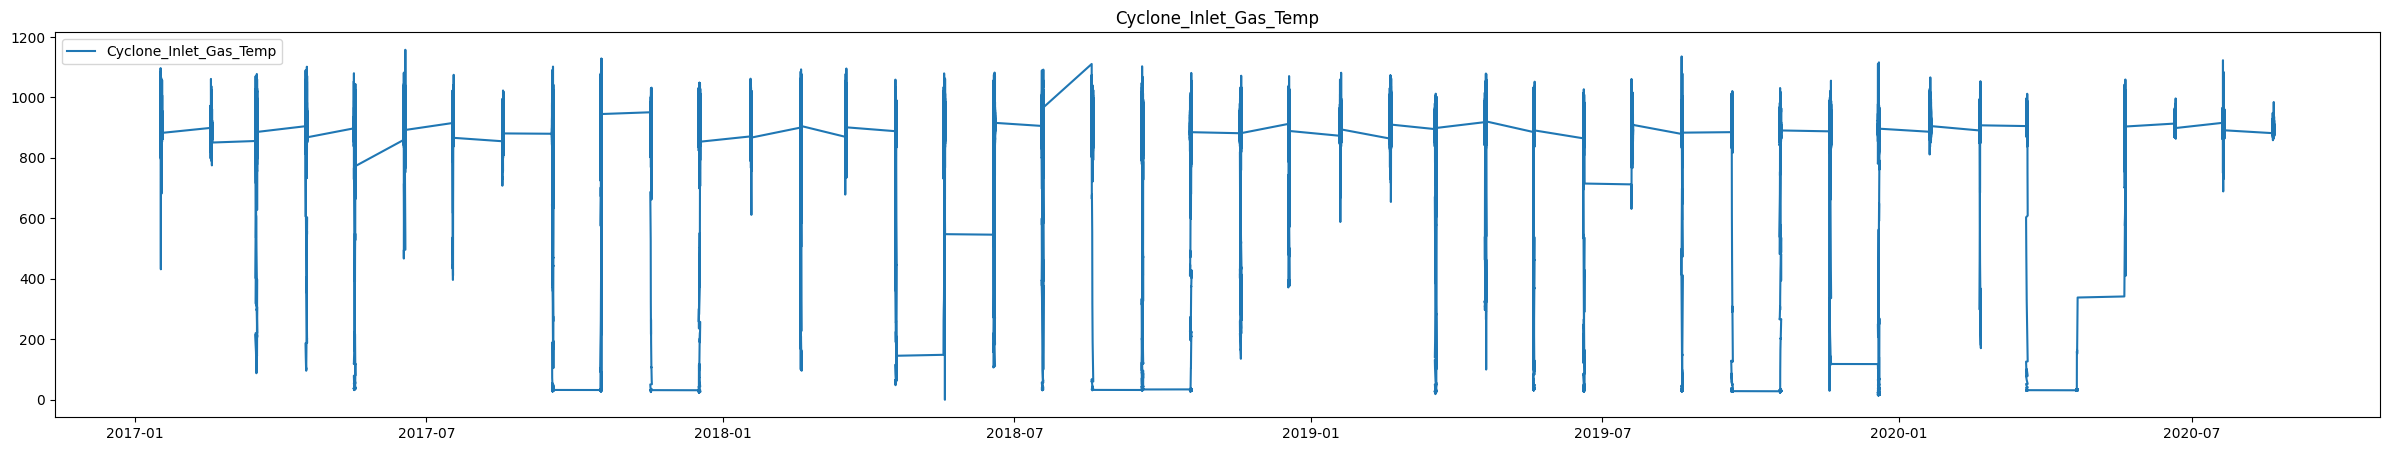

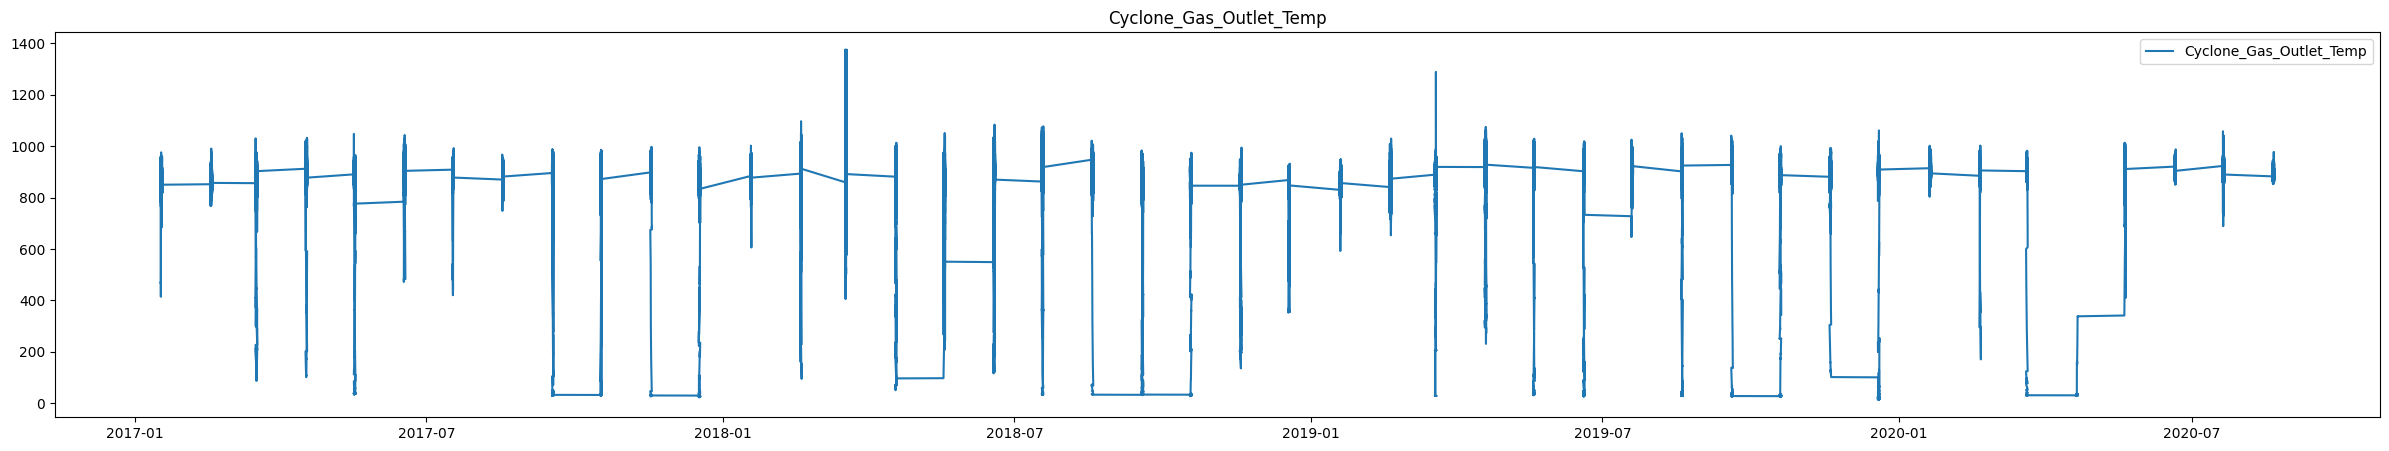

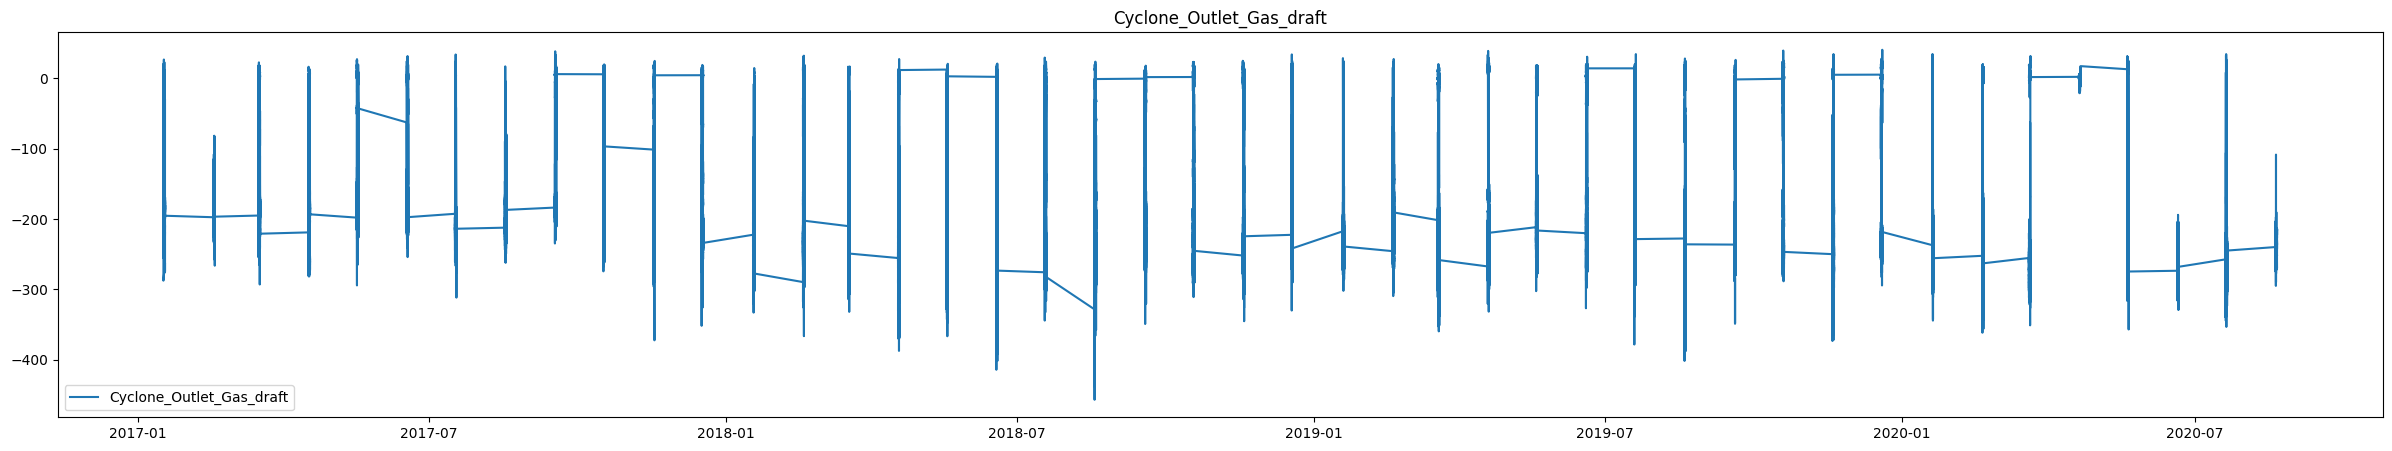

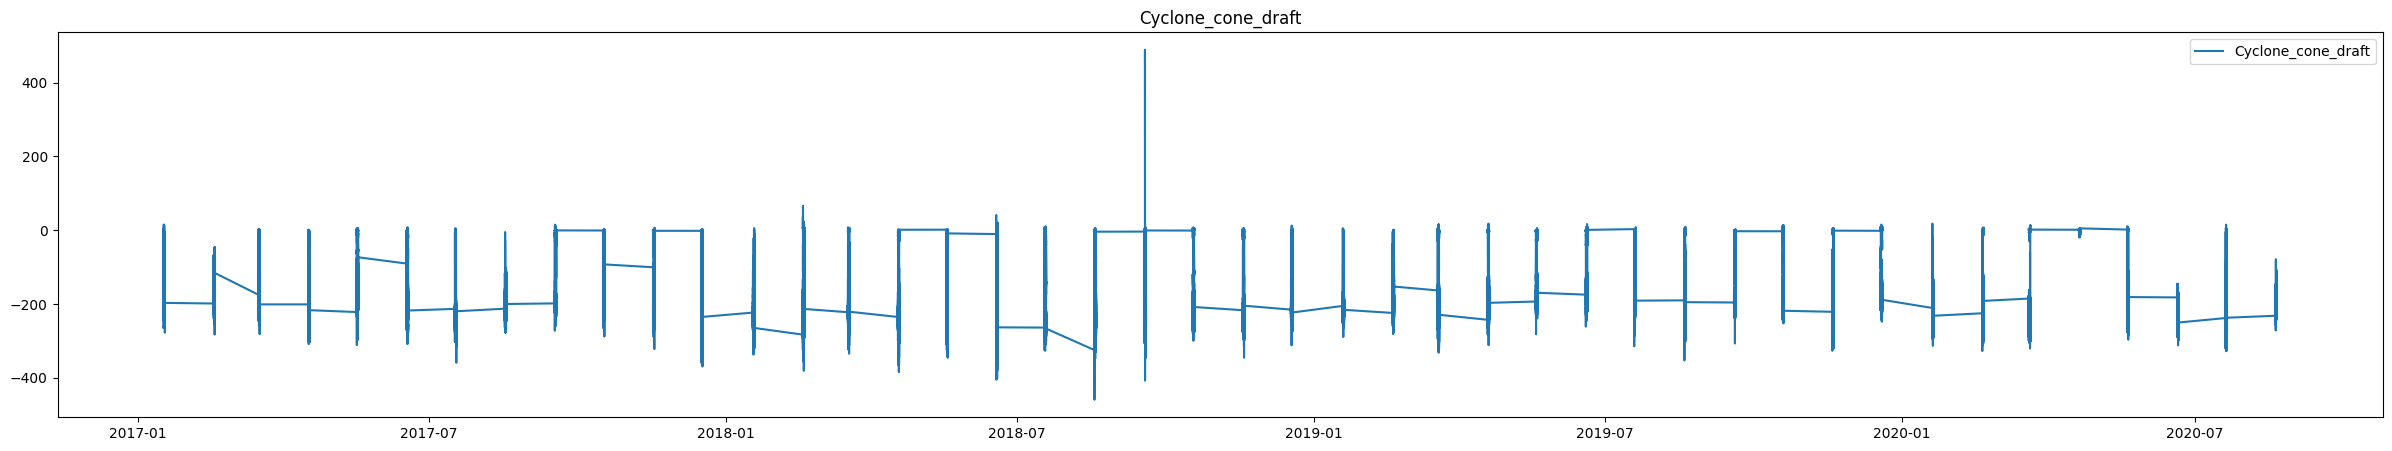

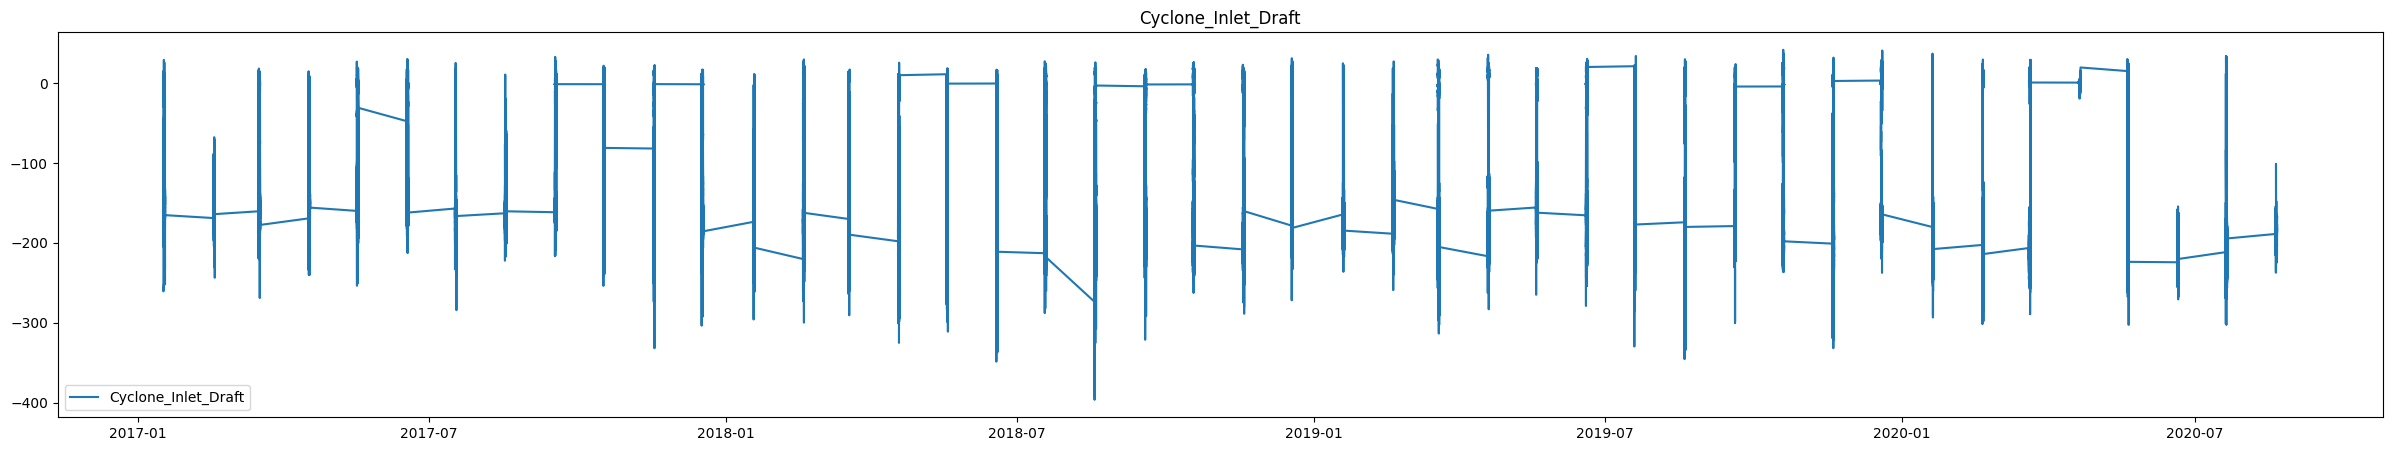

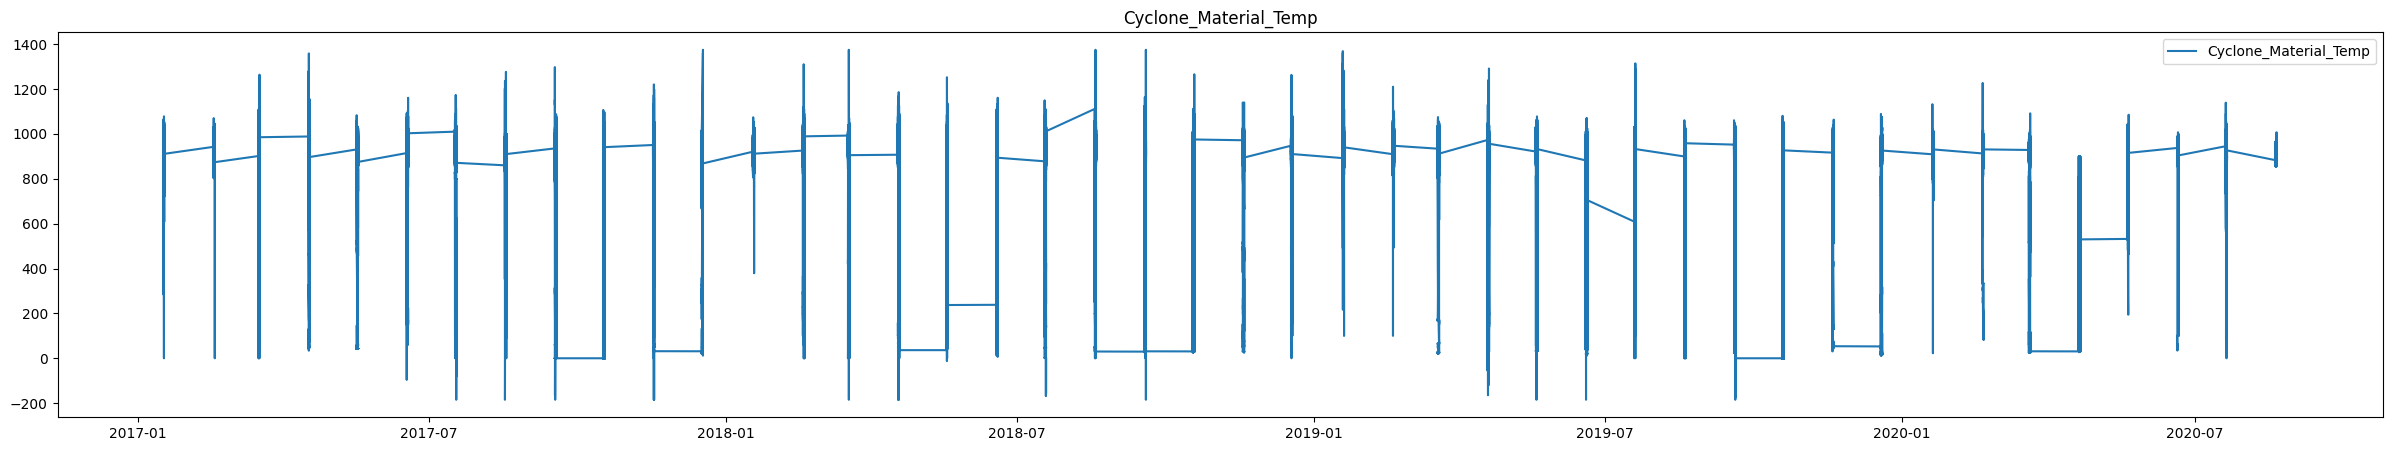

In [5]:
import matplotlib.pyplot as plt
for column in float_columns:
    plt.figure(figsize=(30, 5))
    plt.plot(data['time'], data[column], label=column)
    plt.title(column)
    plt.legend()
    plt.show()

##### 3.2: Scatter plot

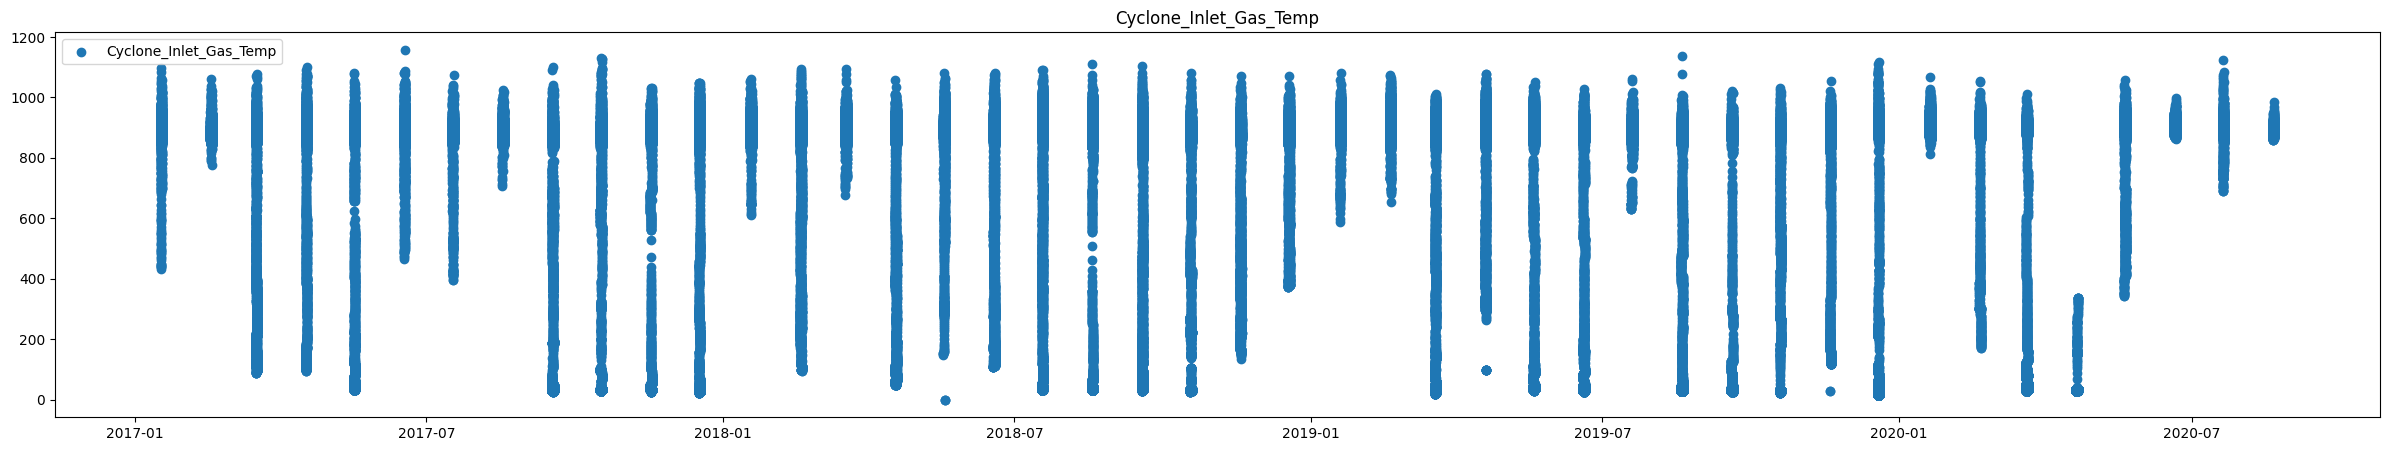

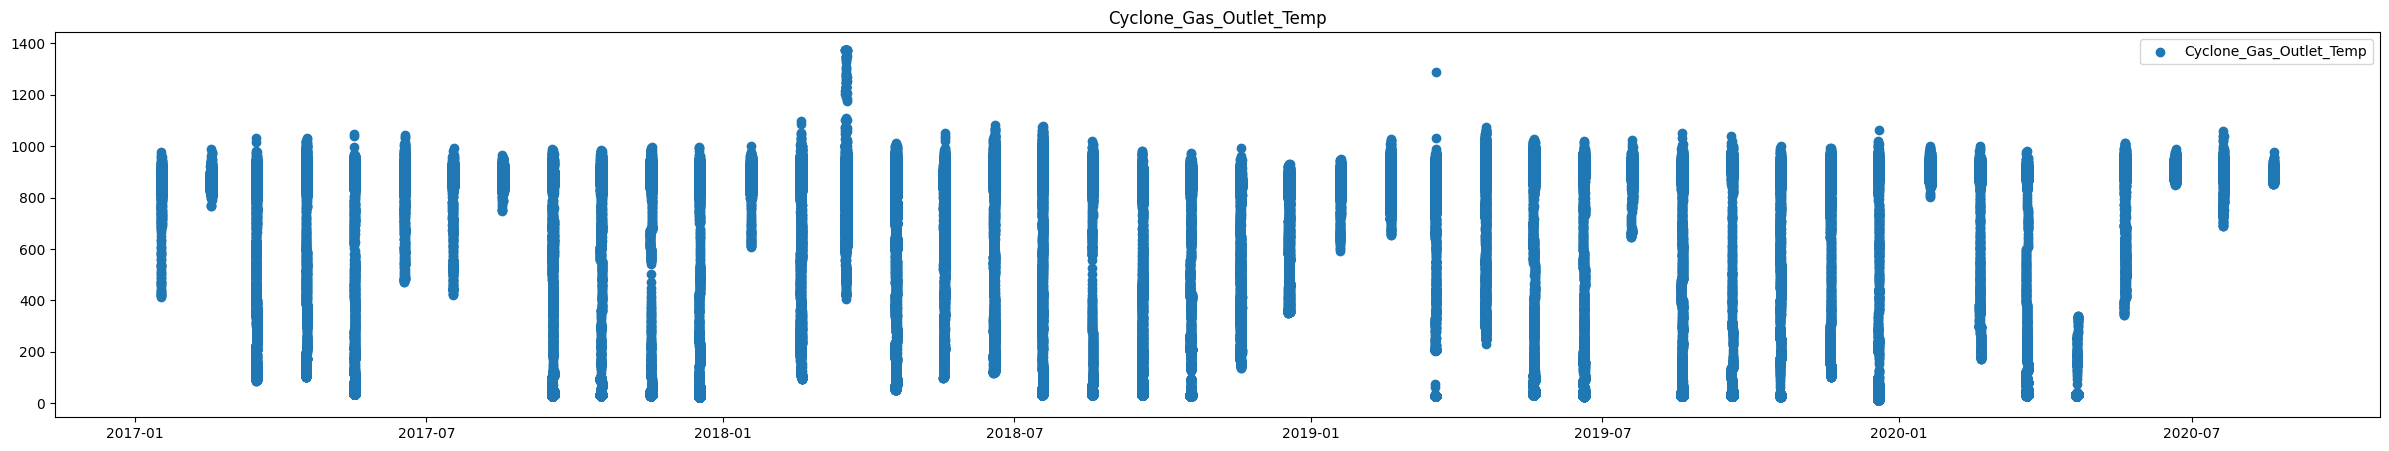

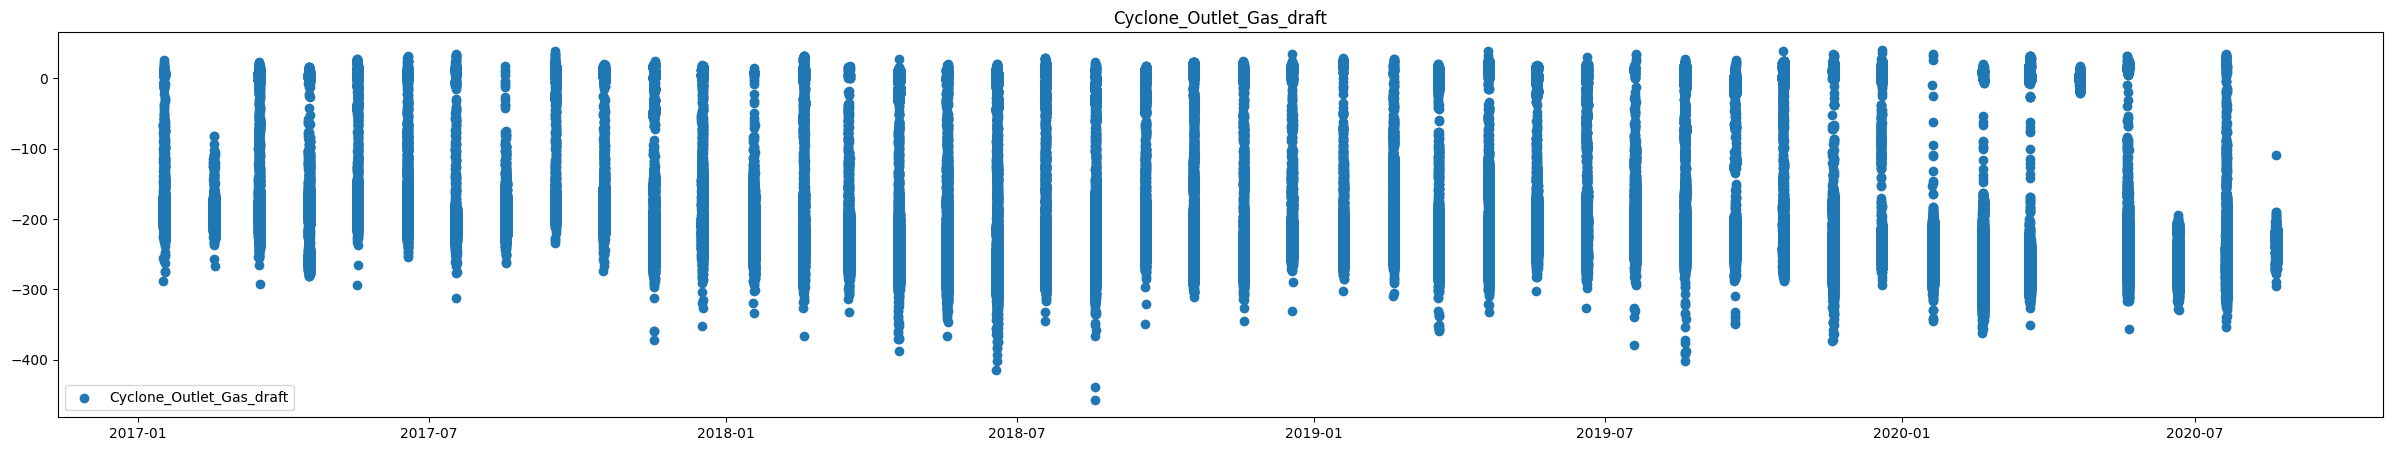

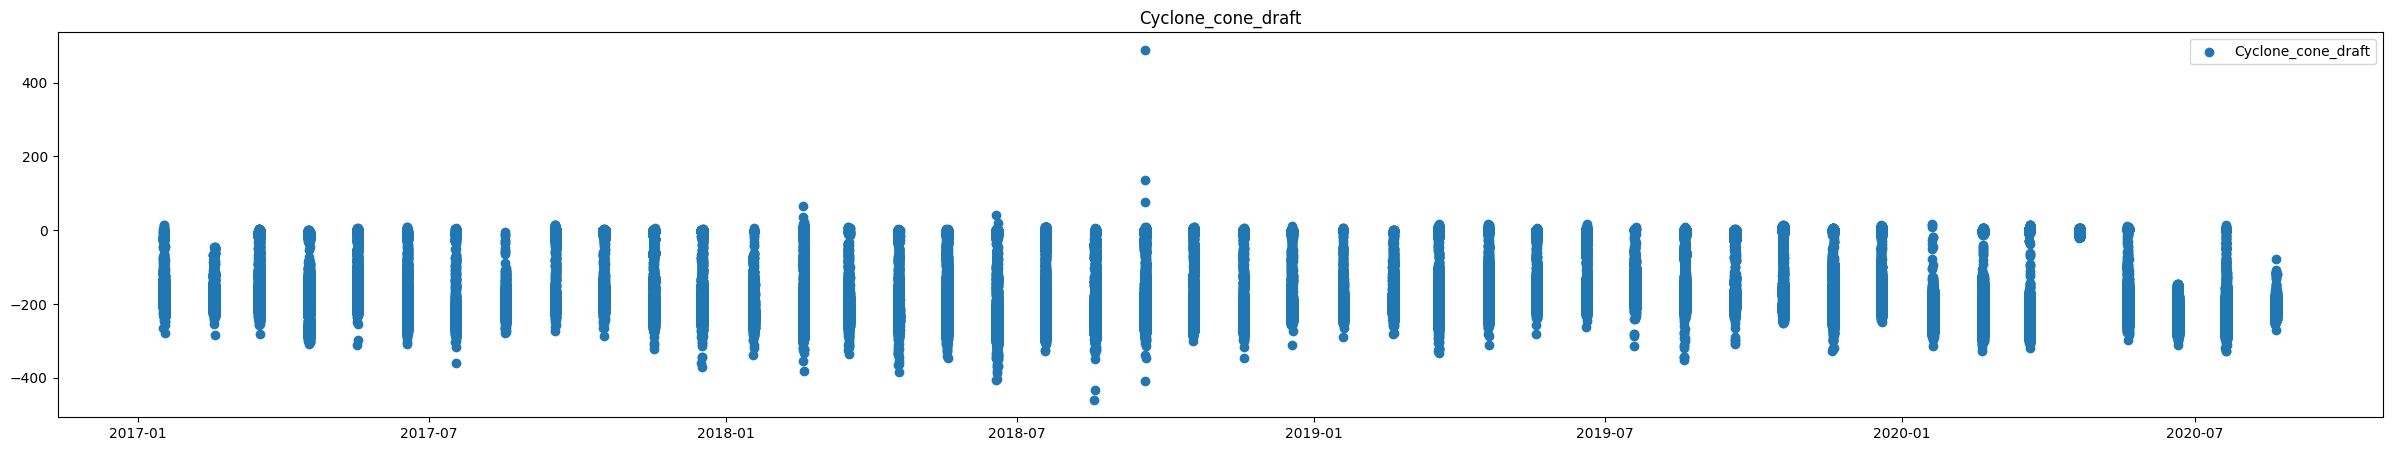

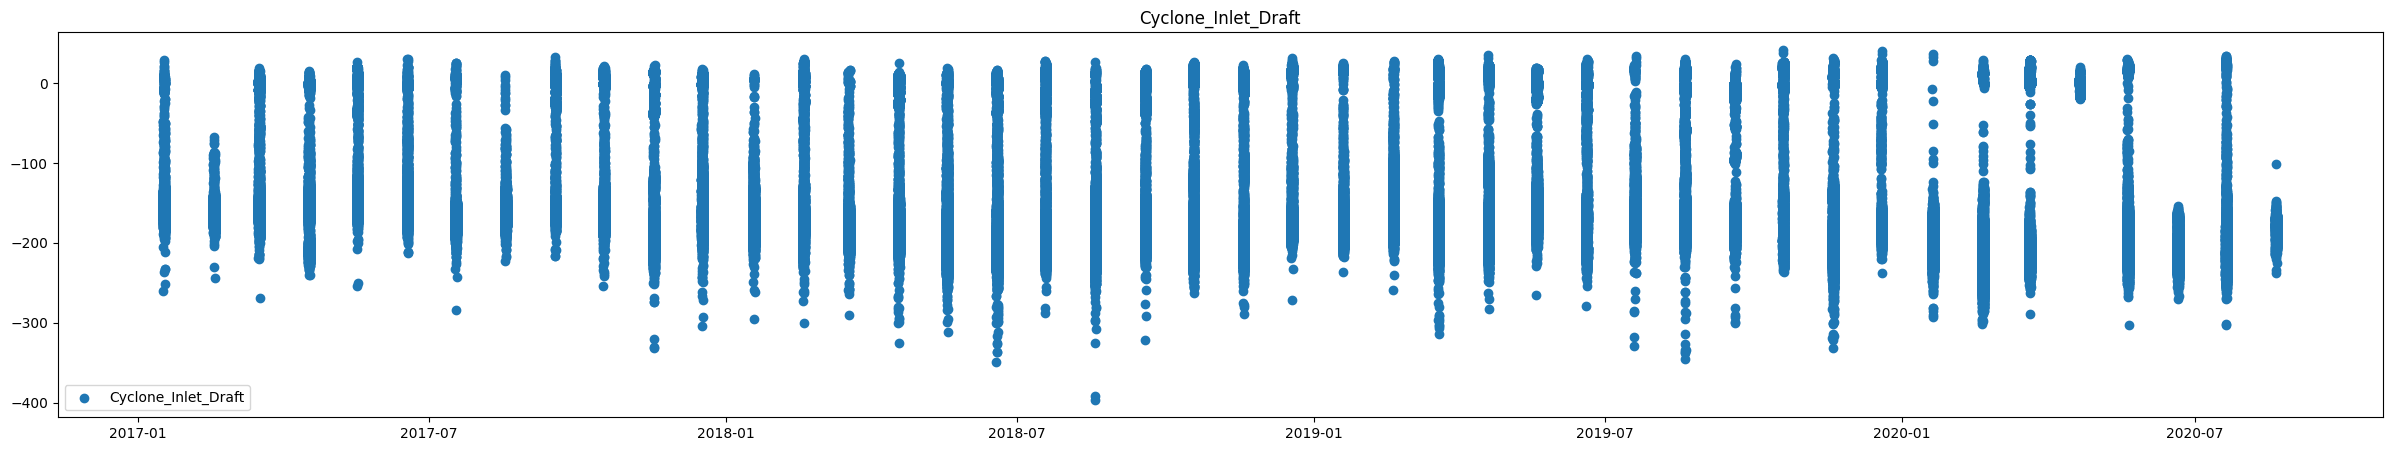

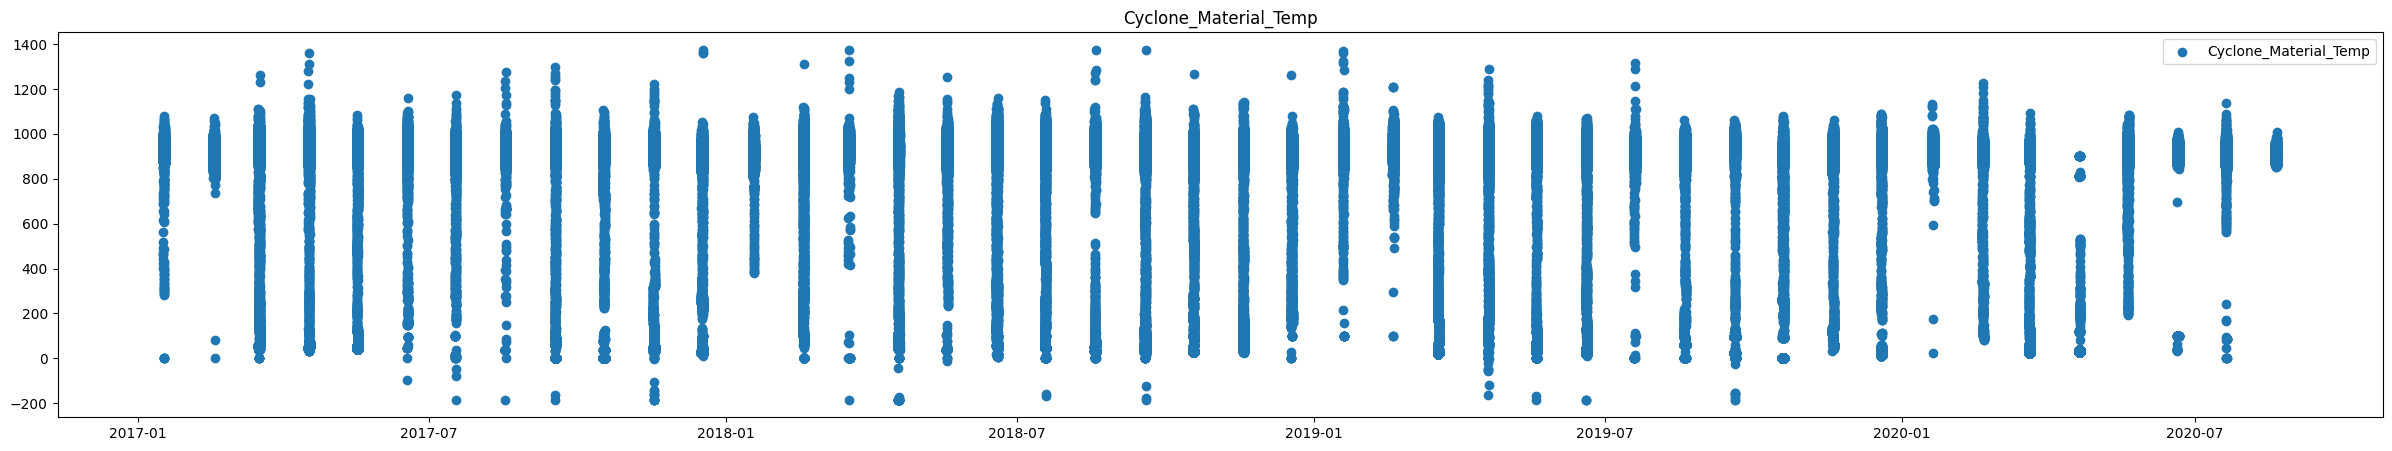

In [6]:
for column in float_columns:
    plt.figure(figsize=(30, 5))
    plt.scatter(data['time'], data[column], label=column)
    plt.title(column)
    plt.legend()
    plt.show()

##### 3.3: Density plots

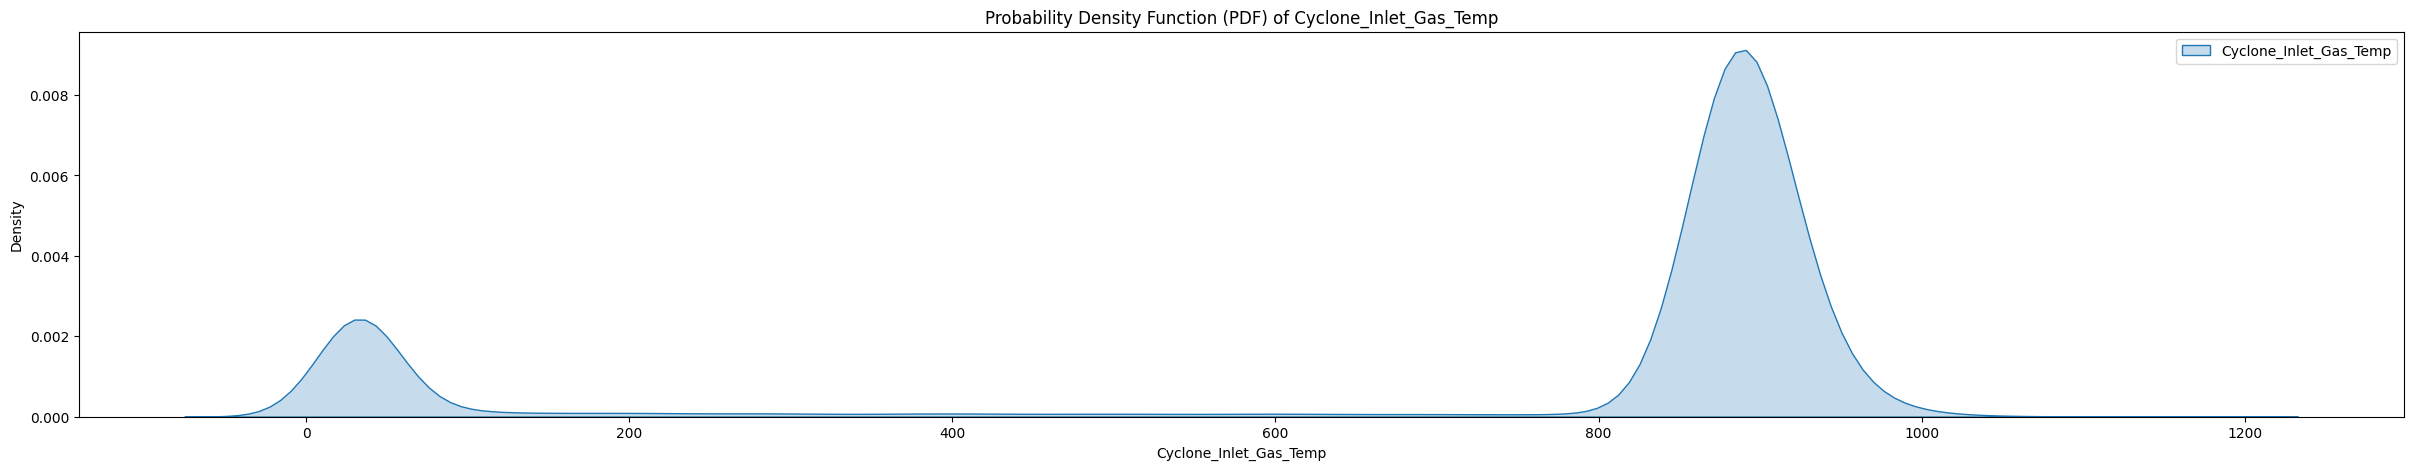

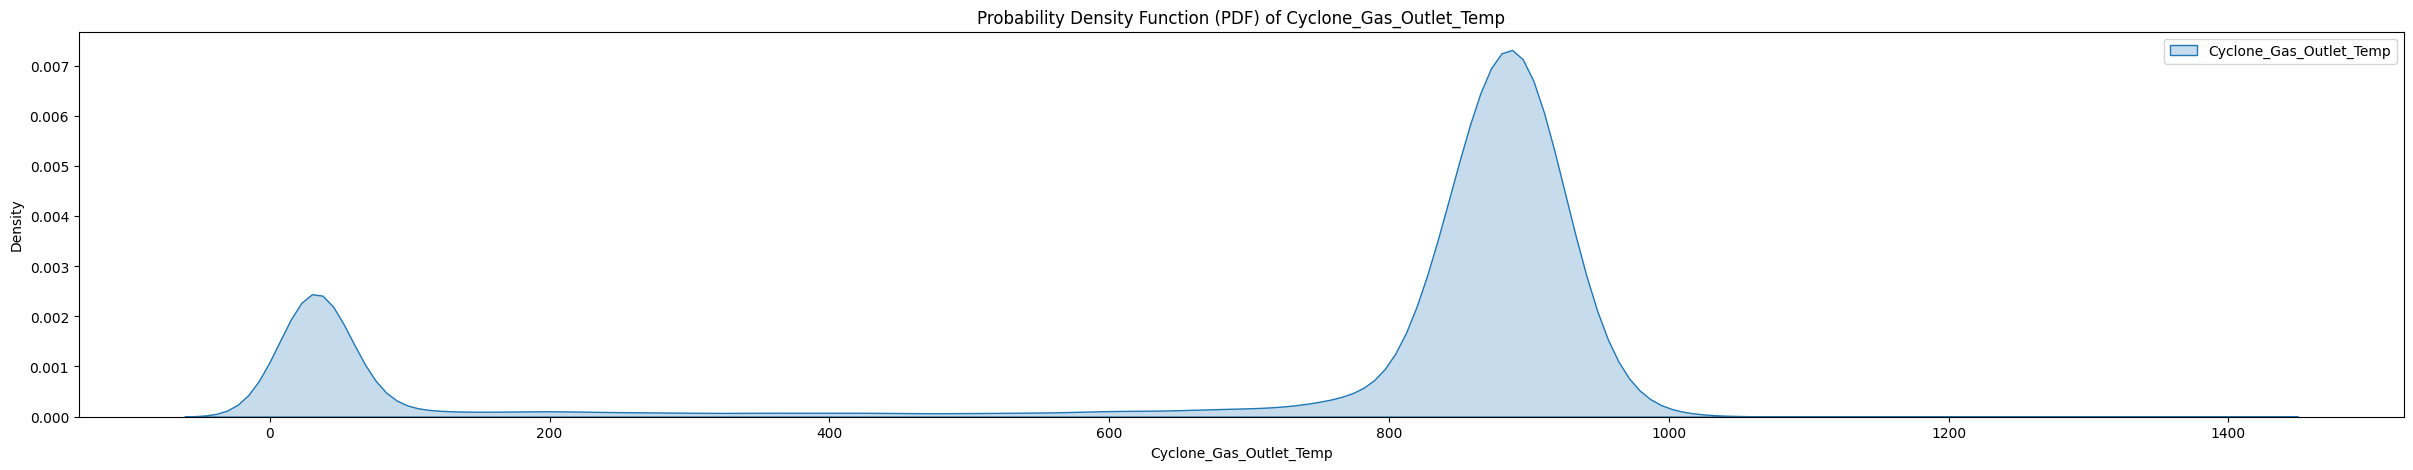

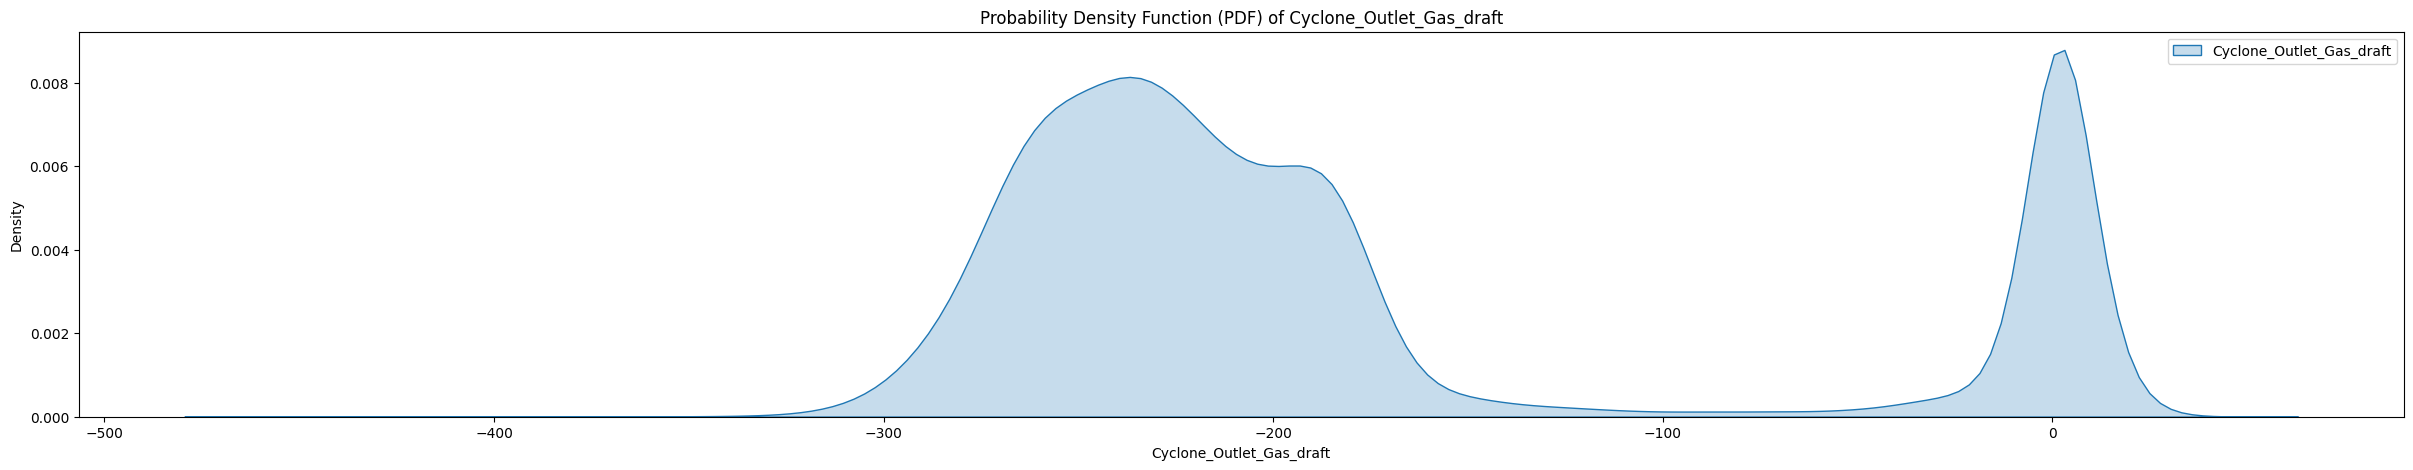

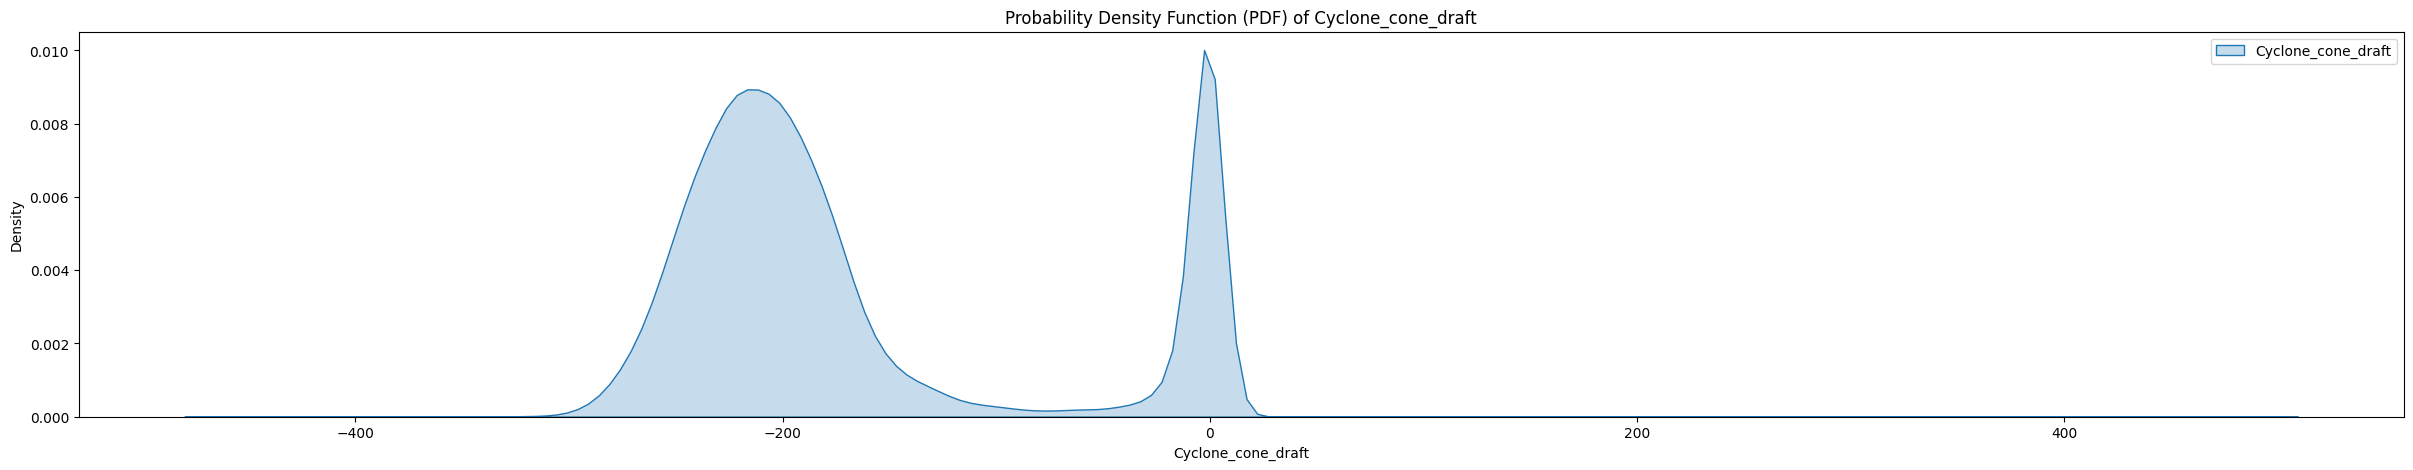

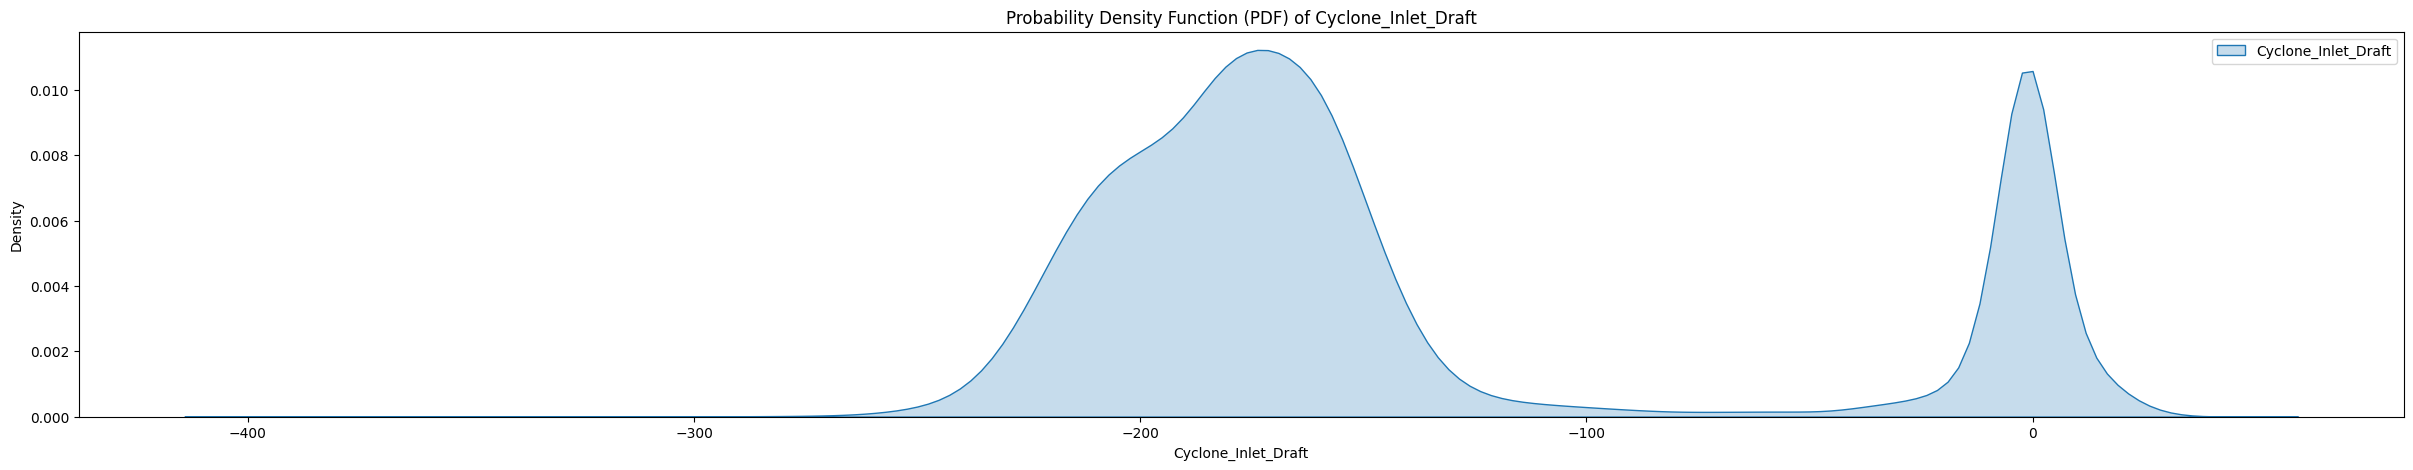

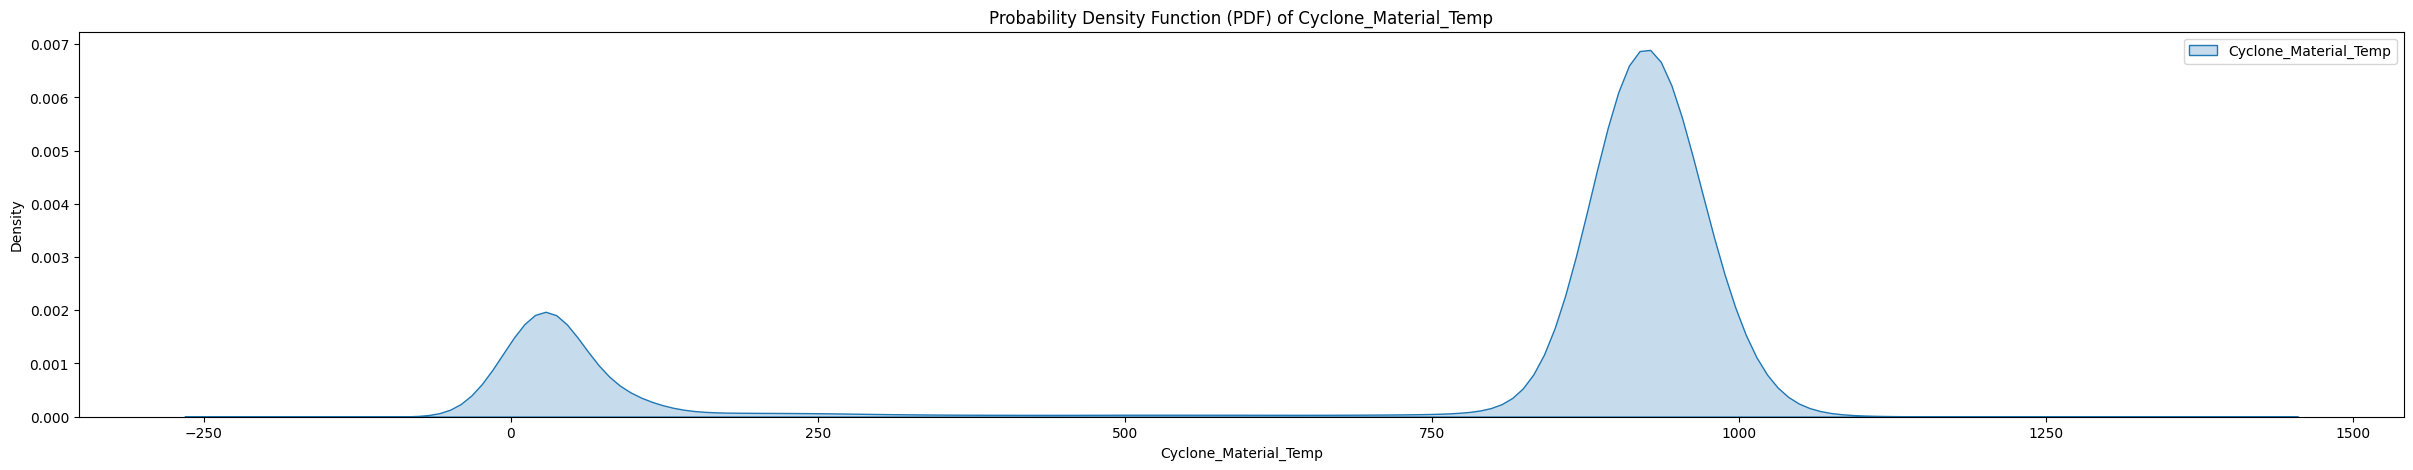

In [7]:
for column in float_columns:
    plt.figure(figsize=(30, 5))  
    sns.kdeplot(data[column], label=column, fill=True)  
    plt.title(f'Probability Density Function (PDF) of {column}')  
    plt.xlabel(column)  
    plt.ylabel('Density')  
    plt.legend()  
    plt.show()

#### Step 4: Standardize the data

In [23]:
from sklearn.preprocessing import StandardScaler
features = ['Cyclone_Inlet_Gas_Temp', 'Cyclone_Gas_Outlet_Temp', 
            'Cyclone_Outlet_Gas_draft', 'Cyclone_cone_draft', 
            'Cyclone_Inlet_Draft', 'Cyclone_Material_Temp']

scaler = StandardScaler()
df_scaled = scaler.fit_transform(data[features])
df_scaled = pd.DataFrame(df_scaled, columns=features)
df_scaled.head()

,Cyclone_Inlet_Gas_Temp,Cyclone_Gas_Outlet_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Inlet_Draft,Cyclone_Material_Temp
0,0.425947,0.418129,-0.116684,-0.236743,-0.057739,0.454097
1,0.461281,0.450129,-0.064085,-0.192976,-0.107521,0.476119
2,0.450437,0.460991,-0.033090,-0.019349,-0.046260,0.493350
3,0.449249,0.460344,-0.011788,-0.112217,-0.018016,0.490411
4,0.499144,0.491760,-0.003409,-0.099886,-0.025367,0.522105


#### Step 5: Apply Isolation Forest for anomaly detection

In [24]:
from sklearn.ensemble import IsolationForest

iso_forest = IsolationForest(contamination=0.01, random_state=42)
data['anomaly'] = iso_forest.fit_predict(df_scaled)
data['anomaly'] = data['anomaly'].apply(lambda x: 1 if x == -1 else 0)
print(data['anomaly'].value_counts())

anomaly
0    373352
1      3772
Name: count, dtype: int64


#### Step 5: Visualize the anomalies with respective to their time period

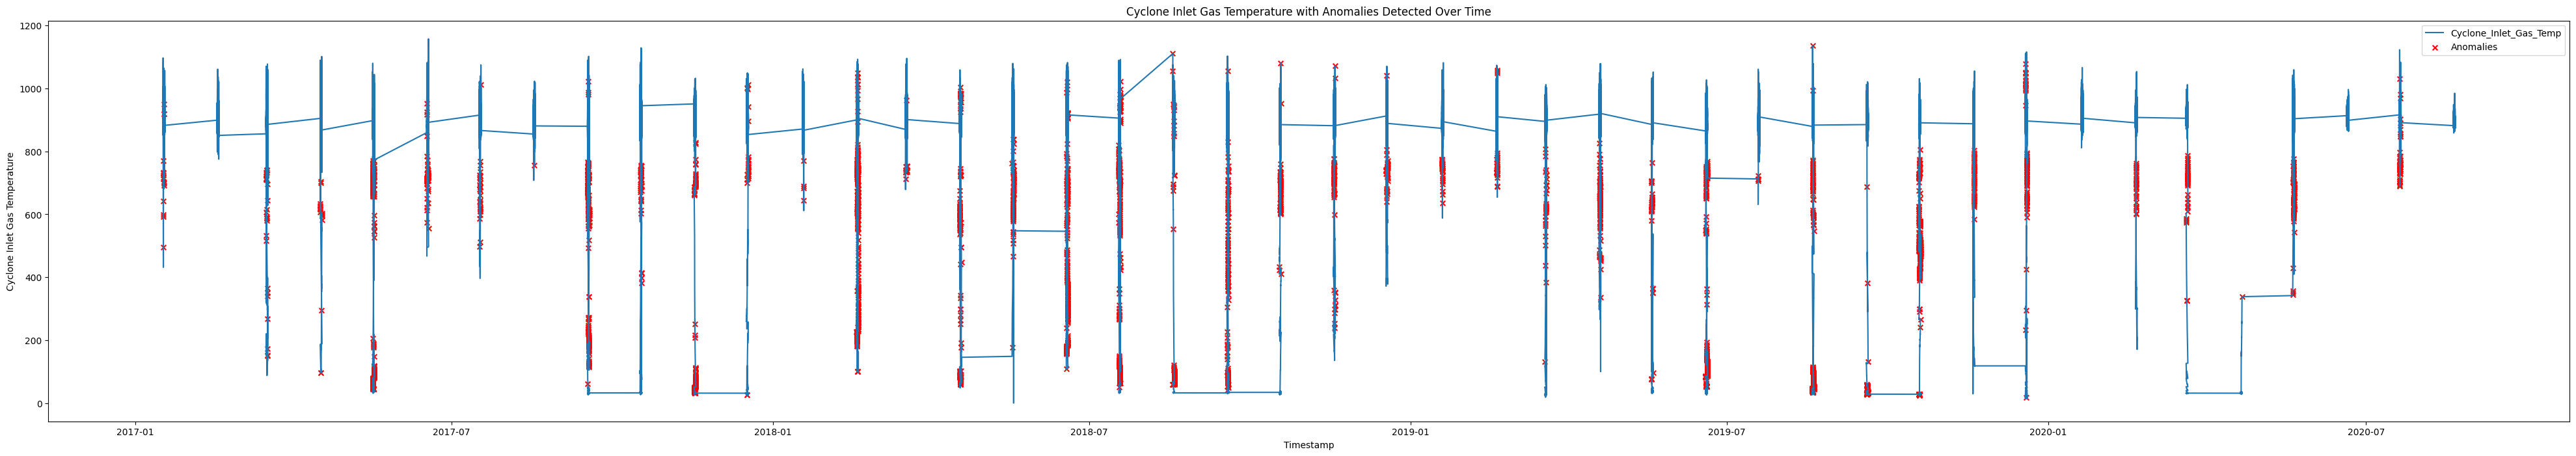

In [33]:
import matplotlib.pyplot as plt

data.set_index('time', inplace=True)
plt.figure(figsize=(50, 8))  
plt.plot(data.index, data['Cyclone_Inlet_Gas_Temp'], label='Cyclone_Inlet_Gas_Temp')

plt.scatter(data[data['anomaly'] == 1].index, 
            data[data['anomaly'] == 1]['Cyclone_Inlet_Gas_Temp'], 
            color='red', label='Anomalies', s=30, marker='x')

plt.title('Cyclone Inlet Gas Temperature with Anomalies Detected Over Time')
plt.xlabel('Timestamp') 
plt.ylabel('Cyclone Inlet Gas Temperature')
plt.legend()

plt.show()


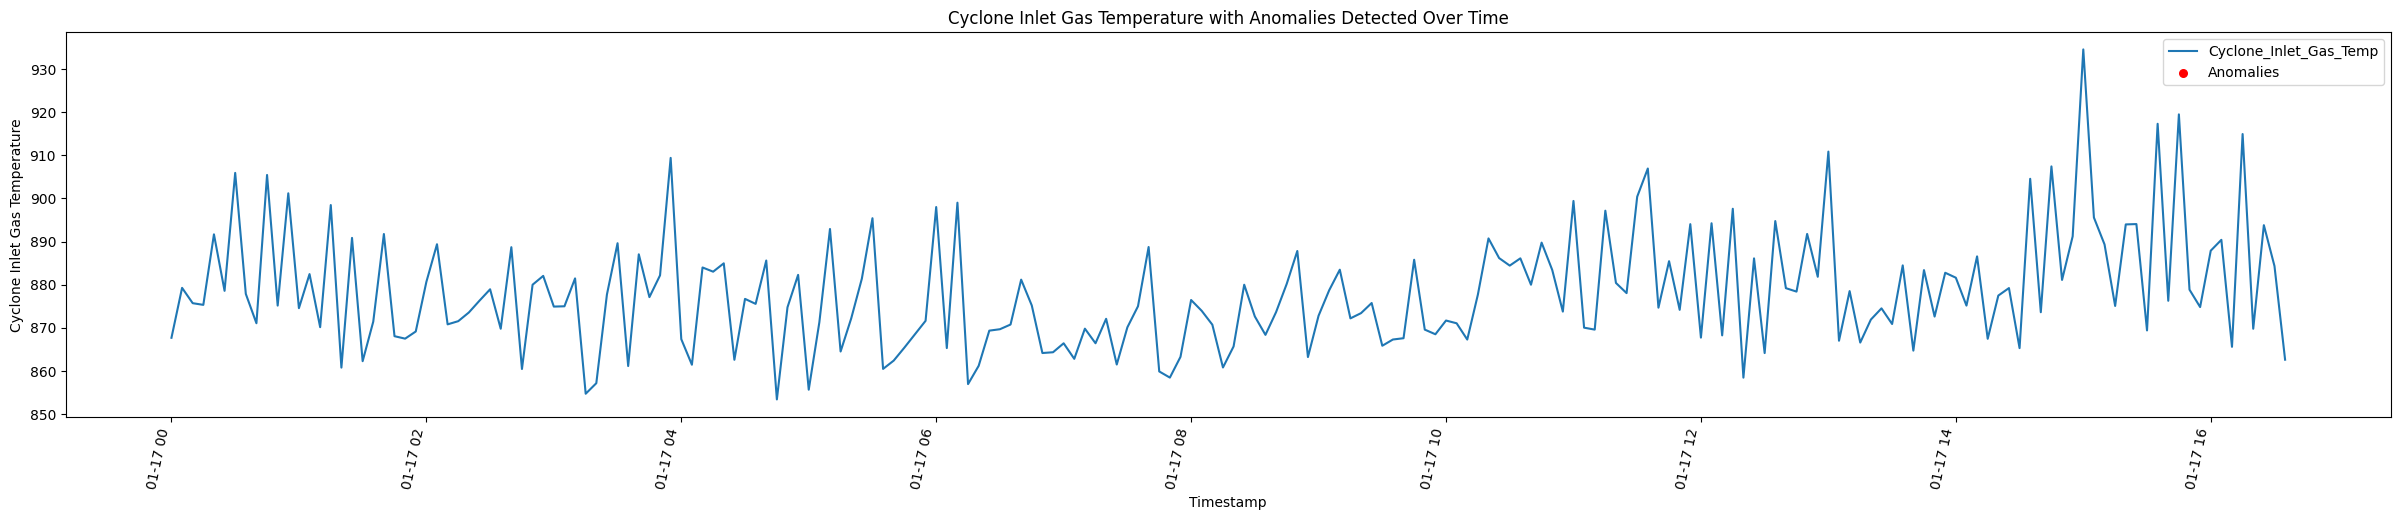

In [27]:
df = data[:200]
plt.figure(figsize=(30, 5))  
plt.plot(df['time'], df['Cyclone_Inlet_Gas_Temp'], label='Cyclone_Inlet_Gas_Temp')

plt.scatter(df[df['anomaly'] == 1].index, 
            df[df['anomaly'] == 1]['Cyclone_Inlet_Gas_Temp'], 
            color='red', label='Anomalies', s=30, marker='o')

plt.title('Cyclone Inlet Gas Temperature with Anomalies Detected Over Time')
plt.xlabel('Timestamp') 
plt.ylabel('Cyclone Inlet Gas Temperature')
plt.legend()
plt.xticks(rotation=78, ha='right')  

plt.show()


In [28]:
df = data.reset_index()

In [29]:
df.head()

,index,time,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft,anomaly
0,0,2017-01-17 00:00:00,867.63,910.42,-189.54,-186.04,852.13,-145.90,0
1,1,2017-01-17 00:05:00,879.23,918.14,-184.33,-182.10,862.53,-149.76,0
2,2,2017-01-17 00:10:00,875.67,924.18,-181.26,-166.47,866.06,-145.01,0
3,3,2017-01-17 00:15:00,875.28,923.15,-179.15,-174.83,865.85,-142.82,0
4,4,2017-01-17 00:20:00,891.66,934.26,-178.32,-173.72,876.06,-143.39,0


In [32]:
print(len(df[df['anomaly']==1]['time']))
df[df['anomaly']==1]['time'].reset_index(drop=True)


3772


0      2017-01-17 09:25:00
1      2017-01-17 09:30:00
2      2017-01-17 09:35:00
3      2017-01-17 02:15:00
4      2017-01-17 02:30:00
               ...        
3767   2020-07-20 10:55:00
3768   2020-07-20 11:00:00
3769   2020-07-20 11:10:00
3770   2020-07-20 11:15:00
3771   2020-07-20 12:05:00
Name: time, Length: 3772, dtype: datetime64[ns]

In [34]:
df[df['anomaly']==1].head()

,index,time,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft,anomaly
5245,5297,2017-01-17 09:25:00,919.53,0.00,-126.58,-125.95,856.92,-94.75,1
5246,5298,2017-01-17 09:30:00,919.57,0.00,-137.13,-130.29,856.56,-101.49,1
5247,5299,2017-01-17 09:35:00,949.91,0.00,-145.76,-138.34,882.04,-108.68,1
6310,6363,2017-01-17 02:15:00,769.63,691.05,20.54,4.48,745.29,15.19,1
6313,6366,2017-01-17 02:30:00,725.58,617.59,4.02,-15.90,707.64,0.68,1
